<a href="https://colab.research.google.com/github/TUCchkul/PyTorch-CNN/blob/main/PyTorch_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

In [2]:
%cd /content/drive/MyDrive/Pytorch

/content/drive/MyDrive/Pytorch


In [3]:
!pwd

/content/drive/MyDrive/Pytorch


In [4]:
class Config:
  def __init__(self):
    self.ROOT_DATA_DIR="FashionMNIST"
    self.EPOCH=10
    self.LEARNING_RATE=0.01
    self.BATCH_SIZE=32
    self.IMAGE_SIZE=(28,28)
    self.DEVICE="cuda" if torch.cuda.is_available() else "CPU"
    print(f"THis notebook is using the device: {self.DEVICE}")
    self.SEED=2022
config=Config()



THis notebook is using the device: cuda


In [5]:
# Download the data
train_data=datasets.FashionMNIST(
    root=config.ROOT_DATA_DIR,
    train=True,
    download=True,
    transform=transforms.ToTensor()
)
test_data=datasets.FashionMNIST(
    root=config.ROOT_DATA_DIR,
    train=False,
    download=True, 
    transform=transforms.ToTensor()
)

In [6]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [7]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [8]:
train_data.class_to_idx

{'Ankle boot': 9,
 'Bag': 8,
 'Coat': 4,
 'Dress': 3,
 'Pullover': 2,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt/top': 0,
 'Trouser': 1}

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [10]:
given_label_data=train_data.class_to_idx
given_label_data

{'Ankle boot': 9,
 'Bag': 8,
 'Coat': 4,
 'Dress': 3,
 'Pullover': 2,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt/top': 0,
 'Trouser': 1}

In [11]:
label_map={val:key for key, val in given_label_data.items()}
label_map

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [12]:
train_data.data[2].shape

torch.Size([28, 28])

In [13]:
label_map.items()

dict_items([(0, 'T-shirt/top'), (1, 'Trouser'), (2, 'Pullover'), (3, 'Dress'), (4, 'Coat'), (5, 'Sandal'), (6, 'Shirt'), (7, 'Sneaker'), (8, 'Bag'), (9, 'Ankle boot')])

In [14]:
label_map[0]

'T-shirt/top'

In [15]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [16]:
train_data.targets[0]

tensor(9)

In [17]:
train_data.targets[0].item()

9

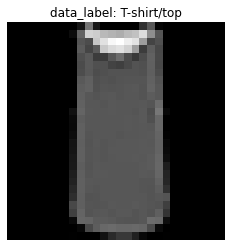

In [18]:
def view_sample_img(data, idx, label_map):

  plt.imshow(data.data[idx], cmap="gray")
  plt.title(f"data_label: {label_map[data.targets[idx].item()]}")
  plt.axis("off")
view_sample_img(train_data,2, label_map)

In [19]:
# Create DataLoader
train_data_loader=DataLoader(
    dataset=train_data,
    batch_size=config.BATCH_SIZE,
    shuffle=True
)
test_data_loader=DataLoader(
    dataset=test_data,
    batch_size=config.BATCH_SIZE,
    shuffle=False
)

In [20]:
for images, labels in train_data_loader:
  print(images.shape)
  print(labels.shape)
  break


torch.Size([32, 1, 28, 28])
torch.Size([32])


In [21]:
images[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.5020, 0.6902, 0.6902, 0.7216, 0.8000,
          0.5843, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0235,
          0.0000, 0.0000, 0.4667, 1.0000, 0.9765, 0.9608, 0.9686, 0.9608,
          1.0000, 0.7373, 0.0000, 0.0000, 0.0353, 0.0157, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0000, 0.0000,
          0.0000, 0.0000, 0.9137, 0.9059, 0.9490, 0.9765, 0.9686, 0.9647,
          0.9216, 0.9490, 0.4392, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000, 0.4392,
          0.7882, 0.8863, 0.9412, 0.9020, 0.9216, 0.9294, 0.9412, 0.9412,
          0.9216, 0.9176, 0.9843, 0.7804, 0.2706, 0.0000,

In [22]:
images[0].shape

torch.Size([1, 28, 28])

In [23]:
images[0].squeeze().shape

torch.Size([28, 28])

In [24]:
images[0].squeeze().shape, images[0].unsqueeze(dim=1).shape

(torch.Size([28, 28]), torch.Size([1, 1, 28, 28]))

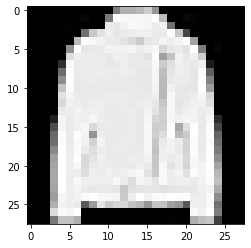

In [25]:
plt.imshow(images[0].squeeze(), cmap="gray")

In [26]:
images[0].squeeze().numpy()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5019608 , 0.6901961 , 0.6901961 , 0.72156864,
        0.8       , 0.58431375, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.02352941, 0.        , 0.        ,
        0.46666667, 1.        , 0.9764706 , 0.9607843 , 0.96862745,
        0.9607843 , 1.        , 0.7372549 , 0.        , 0.        ,
        0.03529412, 0.01568628, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.9137255 , 0.90588236, 0.9490196 , 0.9764706 , 0.96862745,
        0.9647059 , 0.9215

In [27]:
class CNN(nn.Module):
  def __init__(self, in_, out_):
    super(CNN, self).__init__()
    self.conv_pool_01=nn.Sequential(
        nn.Conv2d(in_channels=in_,out_channels=8, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)

    )
    self.conv_pool_02=nn.Sequential(
        nn.Conv2d(in_channels=8,out_channels=16, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.Flatten=nn.Flatten()
    self.FC_01=nn.Linear(in_features=16*4*4, out_features=128)
    self.FC_02=nn.Linear(in_features=128, out_features=64)
    self.FC_03=nn.Linear(in_features=64,out_features=out_)
  def forward(self,x):
    x=self.conv_pool_01(x)
    x=self.conv_pool_02(x)
    x=self.Flatten(x)
    x=F.relu(self.FC_01(x))
    x=F.relu(self.FC_02(x))
    x=F.relu(self.FC_03(x))
    return x

In [28]:
model=CNN(1,10)
print(model)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)


In [29]:
next(model.parameters()).is_cuda

False

In [30]:
model.to(config.DEVICE)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)

In [31]:
next(model.parameters()).is_cuda

True

In [32]:
#Checking how many trainble parameters in a model
def count_params(model):
  model_params={"Modules":list(), "Parameters":list()}
  total={"trainable":0, "non_trainable":0}
  for name, parameters in model.named_parameters():
    param=parameters.numel()
    if not parameters.requires_grad:
      total["non_trainable"] +=param

      continue
    
    model_params["Modules"].append(name)
    model_params["Parameters"].append(param)
    total["trainable"] +=param
  df=pd.DataFrame(model_params)
  df=df.style.set_caption(f"Total trainable parameters: {total}")
  return df
count_params(model)

,Modules,Parameters
0,conv_pool_01.0.weight,200
1,conv_pool_01.0.bias,8
2,conv_pool_02.0.weight,3200
3,conv_pool_02.0.bias,16
4,FC_01.weight,32768
5,FC_01.bias,128
6,FC_02.weight,8192
7,FC_02.bias,64
8,FC_03.weight,640
9,FC_03.bias,10


In [33]:
crieterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=config.LEARNING_RATE)

In [34]:
# Training loop
for epoch in range(config.EPOCH):
  with tqdm(train_data_loader) as tqdm_epoch:
    for images, labels in tqdm_epoch:
      tqdm_epoch.set_description(f"Epoch {epoch+1}/{config.EPOCH}")
      # put the images on device
      images=images.to(config.DEVICE)
      labels=labels.to(config.DEVICE)
      # Forward pass
      outputs=model(images)
      loss=crieterion(outputs, labels)# passing the pred and targets value
      # Backward propagations
      optimizer.zero_grad()# past grad(zero the gradient first)
      loss.backward()# calculate the gradient for each weights
      optimizer.step()#update each of thr  weights


      tqdm_epoch.set_postfix(loss=loss.item())

Epoch 10/10: 100%|██████████| 1875/1875 [00:25<00:00, 74.52it/s, loss=1.82]


In [36]:
os.makedirs("model_dir", exist_ok=True)
model_file_path=os.path.join("model_dir", "CNN_model.pth")
torch.save(model,model_file_path)

In [37]:
# Load the model
loaded_model=torch.load(model_file_path)

In [38]:
pred=np.array([])
target=np.array([])

with torch.no_grad():
  for batch, data in enumerate(test_data_loader):
    images=data[0].to(config.DEVICE)
    labels=data[1].to(config.DEVICE)

    y_pred=model(images)
    pred=np.concatenate((pred, torch.argmax(y_pred,1).cpu().numpy()))
    target=np.concatenate((target, labels.cpu().numpy()))

In [39]:
# Confusion matrix
cm=confusion_matrix(target, pred)
cm

array([[ 994,    0,    0,    0,    0,    4,    0,    2,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   7,    0,    0,    0,    0,  966,    0,   27,    0,    0],
       [ 998,    0,    0,    0,    0,    0,    0,    2,    0,    0],
       [  16,    0,    0,    0,    0,   30,    0,  954,    0,    0],
       [ 962,    0,    0,    0,    0,   19,    0,   19,    0,    0],
       [ 904,    0,    0,    0,    0,   27,    0,   69,    0,    0]])

In [43]:
label_map.values()

dict_values(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

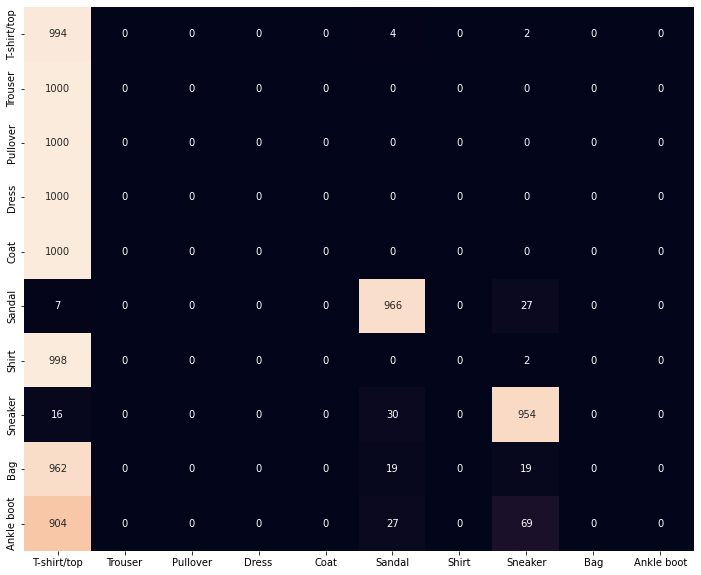

In [44]:
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=label_map.values(), yticklabels=label_map.values(), cbar=False)

In [45]:
data=next(iter(test_data_loader))

In [47]:
data[0].shape

torch.Size([32, 1, 28, 28])

In [48]:
len(data)

2

In [49]:
images, labels=data
images.shape

torch.Size([32, 1, 28, 28])

In [50]:
labels.shape

torch.Size([32])

In [52]:
idx=2
img=images[idx]
img.shape

torch.Size([1, 28, 28])

In [57]:
label=labels[idx]
label_map[label.item()]

'Trouser'

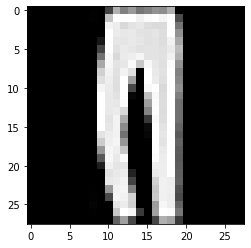

In [55]:
plt.imshow(img.squeeze(), cmap="gray")


In [58]:
model(img)

RuntimeError: ignored

In [59]:
img.unsqueeze(dim=1).shape

torch.Size([1, 1, 28, 28])

In [60]:
model(img.unsqueeze(dim=1))

RuntimeError: ignored

In [63]:
logit=model(img.unsqueeze(dim=1).to(config.DEVICE))

In [64]:
F.softmax(logit, dim=1)

tensor([[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [65]:
sum([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000])

0.9999999999999999

In [66]:
predicted_prob=F.softmax(logit, dim=1)

In [67]:
argmax=torch.argmax(predicted_prob).item()
argmax

0

In [68]:
label_map[argmax]

'T-shirt/top'

In [73]:
def predict(data, model, label_map, device, idx=0):
  images, labels=data
  img=images[idx]
  label=labels[idx]

  plt.imshow(img.squeeze(), cmap="gray")
  logit=model(img.unsqueeze(dim=1).to(config.DEVICE))
  predicted_prob=F.softmax(logit, dim=1)
  argmax=torch.argmax(predicted_prob).item()
  predicted_label=label_map[argmax]
  actual_label=label_map[label.item()]
  plt.title(f"actual: {actual_label} | predicted: {predicted_label}")
  plt.axis("off")
  return  predicted_label, actual_label

('T-shirt/top', 'Trouser')

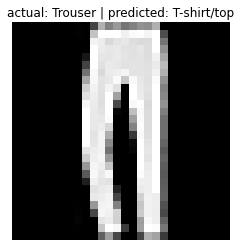

In [74]:
predict(data, model, label_map, config.DEVICE, idx=2)